<a href="https://colab.research.google.com/github/webrockerz2020/smart_health_assistant/blob/main/7_1_Logistic_Regression_Model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling

In [46]:
!pip install fuzzywuzzy

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from sklearn.feature_selection import VarianceThreshold
from fuzzywuzzy import process
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, log_loss

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

import os
#Connecting the driver
from google.colab import drive

drive.mount('/content/drive/')

root_dir = '/content/drive/MyDrive/DAP/python_scripts'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
def accuracy_measure(y_test, y_pred):
    sensitivity_overall = recall_score(y_test, y_pred, average='weighted')
    print('Sensitivity Overall Data:',sensitivity_overall)

    precision_overall = precision_score(y_test, y_pred, average='weighted')
    print('Precision Overall Data:',precision_overall)

    f1_overall = f1_score(y_test, y_pred, average='weighted')
    print('F1 Score Overall Data:',f1_overall)

    # Cohen's Kappa statistic
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Cohen's Kappa:", kappa)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    print("Matthews Correlation Coefficient (MCC):", mcc)

    """# Compute log loss
    logloss = log_loss(y_test, y_pred)
    print(f"Log Loss: {logloss}")

    # AUC and ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Visualize predicted probabilities distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, bins=20, kde=True, color='skyblue')
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Probabilities')
    plt.show()"""

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    # Roc
        # Compute ROC curve and ROC area for each class
    unique_classes = np.unique(np.concatenate([y_test, y_pred]))
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    y_pred_bin = label_binarize(y_test, classes=unique_classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(unique_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for the top N classes
    top_n = 10  # Change this to the desired number of top classes

    # Get a colormap
    colors = plt.cm.tab10(np.arange(len(unique_classes)))

    plt.figure(figsize=(10, 8))
    for i, color in zip(range(top_n), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Top {top_n} Receiver Operating Characteristic (ROC) Curves for diseases')
    plt.legend(loc="lower right")
    plt.show()
    """ # Printing Confusion Matrix calsswise
    unique_classes = np.unique(y_test)



    # Initialize variables to store metrics
    total_tp = 0
    total_tn = 0
    total_fp = 0
    total_fn = 0

    # Iterate over each class
    for cls in unique_classes:
        idx = (y_test == cls)
        true_positive = np.sum((y_pred[idx] == cls))
        true_negative = np.sum((y_pred != cls) & (y_test != cls))
        false_positive = np.sum((y_pred == cls) & (y_test != cls))
        false_negative = np.sum((y_pred != cls) & (y_test == cls))

        total_tp += true_positive
        total_tn += true_negative
        total_fp += false_positive
        total_fn += false_negative

        print(f"\nClass {cls} Metrics:")
        print(f"True Positive (TP): {true_positive}")
        print(f"True Negative (TN): {true_negative}")
        print(f"False Positive (FP): {false_positive}")
        print(f"False Negative (FN): {false_negative}")

    # Consolidated results
    print("\nConsolidated Results:")
    print(f"Total True Positive (TP): {total_tp}")
    print(f"Total True Negative (TN): {total_tn}")
    print(f"Total False Positive (FP): {total_fp}")
    print(f"Total False Negative (FN): {total_fn}")"""


### Using various dimensionality reduction

In [50]:
def low_var():
    df_low_variance = pd.read_csv(os.path.join(root_dir,"low_variance_features.csv"))
    df_low_variance= df_low_variance.fillna(0)
    df_low_variance.isna().any()
    X = df_low_variance.drop('disease', axis=1)
    y = df_low_variance['disease']
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X,y,X_train,y_train,X_test,X_val,y_test, y_val

def rand_forest():
    df_training = pd.read_csv(os.path.join(root_dir,"training_dataset_final.csv"))
    df_feature = pd.read_csv(os.path.join(root_dir,"feature_importance_df.csv"))
    df_feature= df_feature.fillna(0)
    df_training= df_training.fillna(0)
    feature_list=(df_feature['Feature'].head(100)).tolist()
    df_training_important_Features = df_training[feature_list]
    df_training_important_Features['disease'] = df_training['disease']
    df_training_important_Features.info()
    X =df_training_important_Features.drop(columns=['disease'])
    y =df_training_important_Features['disease']
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X,y,X_train,y_train,X_test,X_val,y_test, y_val



# Logistic Regression

In [51]:
def logistic_regression(X,y,X_train,y_train,X_test,X_val,y_test, y_val,pickle_file_name,var):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    classifier = LogisticRegression(max_iter=100)
    classifier.fit(X_scaled, y_train)



    # Make predictions on the test set
    y_pred = classifier.predict(scaler.transform(X_test))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)
    logModel = LogisticRegression()

    # Performing Grid Search using hyperparamters
    param_grid = [
        {'penalty' : ['l2'],
        'C' : np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'liblinear'],
        'max_iter' : [50, 100,1000]
        }
    ]
    clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
    try:
        best_clf = clf.fit(X_train, y_train)

    except UserWarning as warning:
        # Handle the warning as needed
        print(f"Caught a UserWarning: {warning}")

    cv_results = pd.DataFrame(best_clf.cv_results_)
    cv_results.to_csv(os.path.join(root_dir,'LR_hyperparamters_results_'+var+'.csv'))
    print (f'Accuracy - : {best_clf.score(X,y):.3f}')
    print(best_clf)
    best_params = best_clf.best_params_
    print("Best hyperparameters:", best_clf.best_params_)
    print("Best model:", best_clf.best_estimator_)

    #best_params = {'C':29.763514416313132, 'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
    best_params = best_clf.best_params_
    # Create a Logistic Regression model with the best hyperparameters
    best_log_model = LogisticRegression(**best_params)

    # Train the model on the training data
    model = best_log_model.fit(X_train, y_train)
    print("#################################Training Accuracy#################################")
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    class_report_train = classification_report(y_train, train_predictions)
    print("Classification Report on Training Set:")
    print(class_report_train)


    # Make predictions on the testing data
    y_pred = best_log_model.predict(X_test)

    class_report_test = classification_report(y_test, y_pred)
    print("#################################Testing Accuracy#################################")
    print("Classification Report on Test Set:")
    print(class_report_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    accuracy_measure(y_test, y_pred)

    ### Validating the model
    print( "####### Validating the model" )
    predicted_class = best_log_model.predict(X_val)

    class_report_test = classification_report(y_val, predicted_class)
    print("#################################Testing Accuracy#################################")
    print("Classification Report on Test Set:")
    print(class_report_test)
    print("Predicted class:", predicted_class)

    accuracy = accuracy_score(y_val, predicted_class)
    print("Accuracy on the validation set:", accuracy)
    accuracy_measure(y_val, predicted_class)


    ### Saving the model with best parameters logistic regression
    print( "####### Saving the model with best parameters logistic regression" )
    # Save the model to a file using pickle
    with open(os.path.join(root_dir,pickle_file_name), 'wb') as file:
        pickle.dump(model, file)
    return y_pred


In [52]:
X,y,X_train,y_train,X_test,X_val,y_test, y_val = low_var()

In [ ]:
def log_loss_calculation(y_test,y_pred):
    unique_classes = np.unique(np.concatenate([y_test, y_pred]))
    # Convert labels to binary format
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    y_pred_bin = label_binarize(y_pred, classes=unique_classes)

    logloss = log_loss(y_test_bin, y_pred_bin)
    print(f"Log Loss: {logloss}")

In [53]:
file_name = os.path.join(root_dir,'low_var_features_lr.txt')
with open(file_name, 'w') as fp:
    for item in X_train:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [54]:
y_test_lv =y_test

F1 Score: 0.8932979676388365
Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - : 0.891
GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [50, 100, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear']}],
             verbose=True)
Best hyperparameters: {'C': 11.288378916846883, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Best model: LogisticRegression(C=11.288378916846883, max_iter=50, solver='liblinear')
#################################Training Accuracy#################################
Classification Report on Training Set:
                                      precision    reca

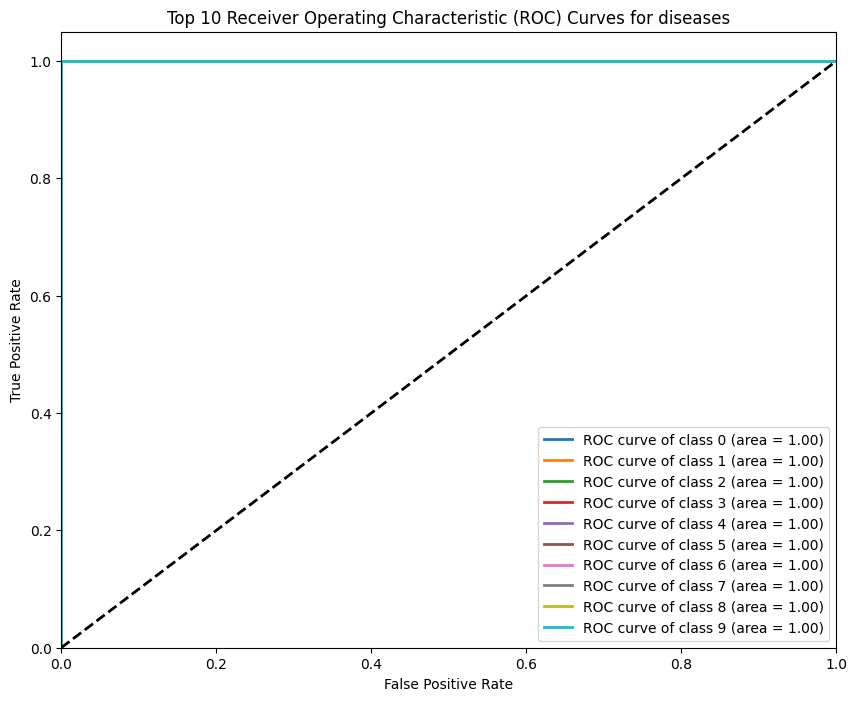

####### Validating the model
#################################Testing Accuracy#################################
Classification Report on Test Set:
                                      precision    recall  f1-score   support

                 Alzheimer's disease       1.00      1.00      1.00        17
                                 HIV       0.86      0.75      0.80         8
    PneumocystisÂ cariniiÂ pneumonia       0.94      1.00      0.97        16
           accidentÂ cerebrovascular       1.00      0.67      0.80         3
acquiredÂ immuno-deficiency syndrome       0.88      0.64      0.74        11
                      adenocarcinoma       1.00      0.80      0.89        10
                            adhesion       0.90      0.90      0.90        10
                       affect labile       0.67      1.00      0.80         2
                              anemia       1.00      1.00      1.00        23
                       anxiety state       1.00      1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Precision Overall Data: 0.8893596502832007
F1 Score Overall Data: 0.8691464457066727
Cohen's Kappa: 0.8685535824904939
Matthews Correlation Coefficient (MCC): 0.8687793865676353
[[17  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0 39]]


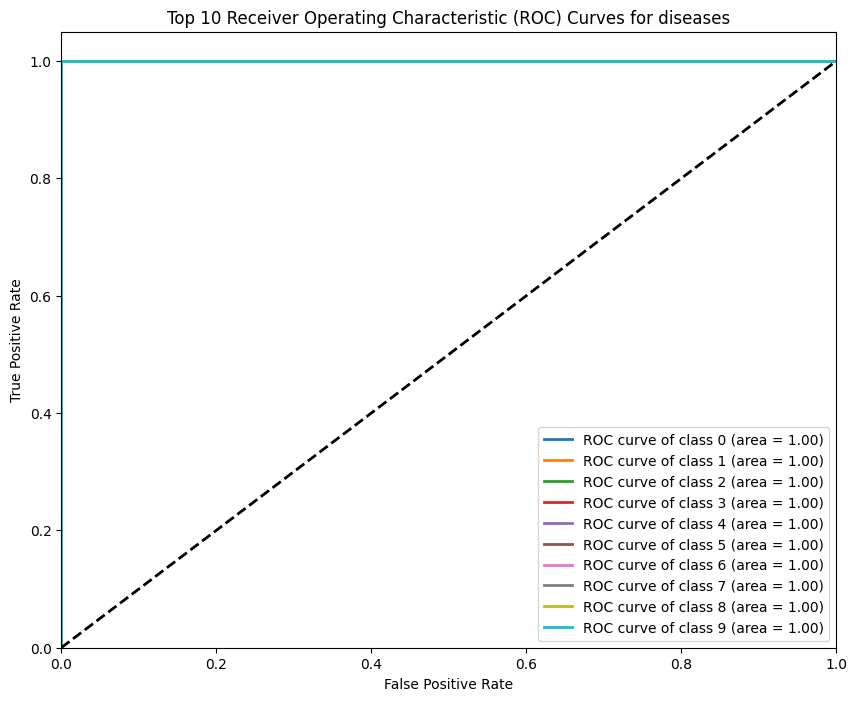

####### Saving the model with best parameters logistic regression


In [55]:
y_pred_lv = logistic_regression(X,y,X_train,y_train,X_test,X_val,y_test, y_val,'logistic_regression_model_lv.pkl','lv')

In [56]:

log_loss_calculation(y_test_lv,y_pred_lv)

Log Loss: 4.713997725272083


In [57]:
X,y,X_train,y_train,X_test,X_val,y_test, y_val = rand_forest()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Columns: 101 entries, pain to disease
dtypes: float64(100), object(1)
memory usage: 9.5+ MB


<ipython-input-50-3b2c874fd775>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_important_Features['disease'] = df_training['disease']


In [58]:
file_name = os.path.join(root_dir,'rand_for_features_lr.txt')
with open(file_name, 'w') as fp:
    for item in X_train:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [59]:
y_test_rf =y_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.8413318269572301
Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - : 0.854
GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [50, 100, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear']}],
             verbose=True)
Best hyperparameters: {'C': 10000.0, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best model: LogisticRegression(C=10000.0, max_iter=50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#################################Training Accuracy#################################
Classification Report on Training Set:
                                      precision    recall  f1-score   support

                 Alzheimer's disease       0.94      0.93      0.93        80
                                 HIV       0.72      0.57      0.63        46
    PneumocystisÂ cariniiÂ pneumonia       0.92      0.95      0.93        83
           accidentÂ cerebrovascular       1.00      0.95      0.97        19
acquiredÂ immuno-deficiency syndrome       0.65      0.67      0.66        45
                      adenocarcinoma       1.00      0.63      0.77        46
                            adhesion       1.00      0.92      0.96        52
                       affect labile       1.00      0.84      0.91        25
                              anemia       0.95      0.94      0.95        89
                       anxiety state       1.00      0.99      1.00       147
                  

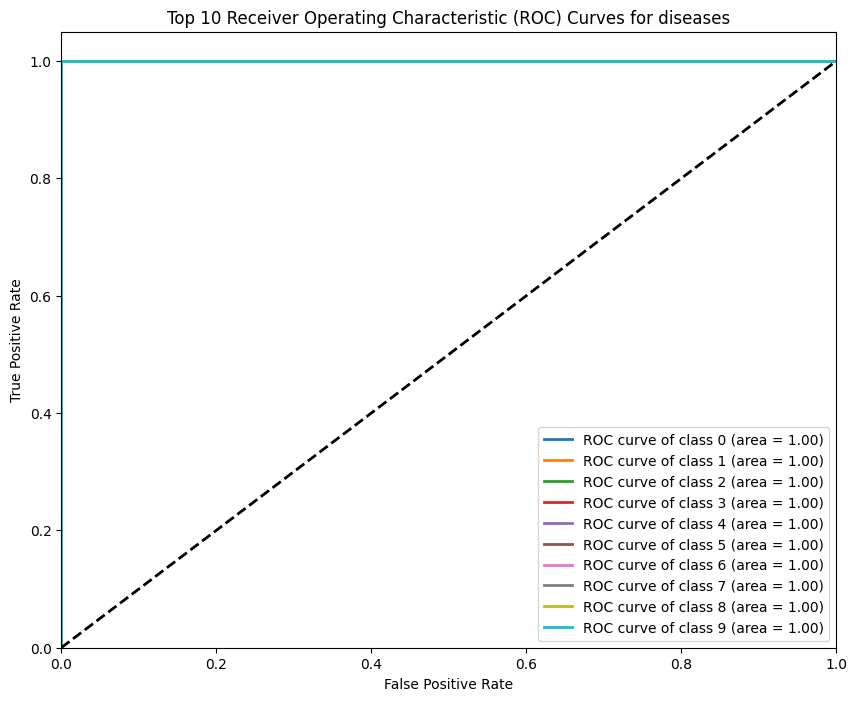

####### Validating the model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#################################Testing Accuracy#################################
Classification Report on Test Set:
                                      precision    recall  f1-score   support

                 Alzheimer's disease       0.82      0.82      0.82        17
                                 HIV       0.80      0.50      0.62         8
    PneumocystisÂ cariniiÂ pneumonia       0.94      0.94      0.94        16
           accidentÂ cerebrovascular       1.00      0.67      0.80         3
acquiredÂ immuno-deficiency syndrome       0.60      0.55      0.57        11
                      adenocarcinoma       1.00      0.90      0.95        10
                            adhesion       1.00      0.90      0.95        10
                       affect labile       1.00      1.00      1.00         2
                              anemia       0.92      1.00      0.96        23
                       anxiety state       1.00      1.00      1.00        24
                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


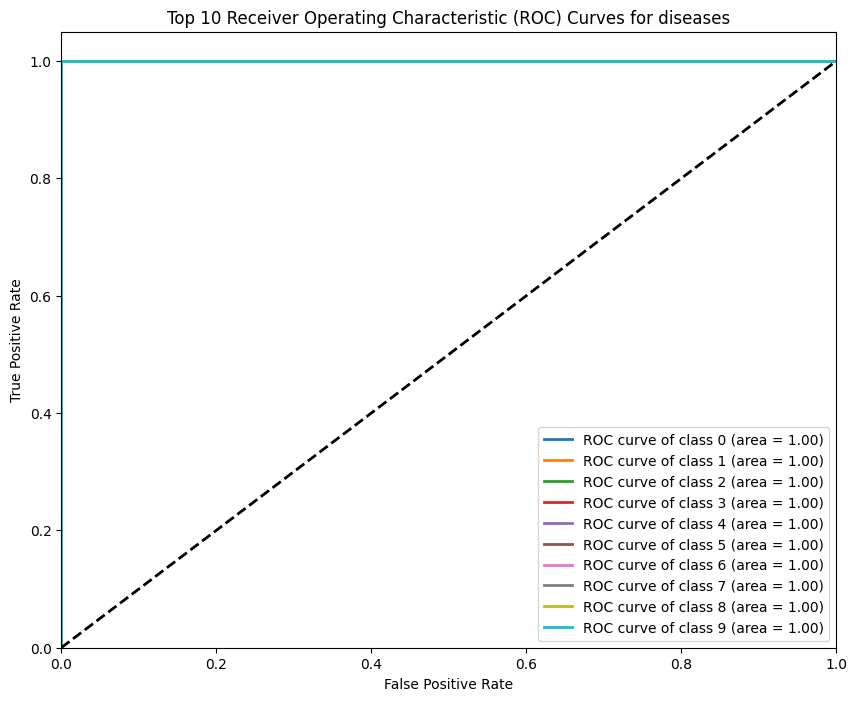

####### Saving the model with best parameters logistic regression


In [60]:
y_pred_rf = logistic_regression(X,y,X_train,y_train,X_test,X_val,y_test, y_val,'logistic_regression_model_rd.pkl','rf')

In [61]:
log_loss_calculation(y_test_rf,y_pred_rf)

Log Loss: 6.071939456831932
